# C3M2: Autograded Assignment

### Outline:
**Here are the objectives of this assignment:**

1. Understand when to apply different kinds of regression models.
2. Fit a GLM to count data and go through model diagnostics and interpretation.
3. Compare the effectiveness of GLMs to Linear Regression models.

**Here are some general tips:**

1. Read the questions carefully to understand what is being asked.
2. When you feel that your work is completed, feel free to hit the ```Validate``` button to see your results on the *visible* unit tests. If you have questions about unit testing, please refer to the "Module 0: Introduction" notebook provided as an optional resource for this course. In this assignment, there are hidden unit tests that check your code. You will not recieve any feedback for failed hidden unit tests until the assignment is submitted. **Do not misinterpret the feedback from visible unit tests as all possible tests for a given question--write your code carefully!**
3. Before submitting, we recommend restarting the kernel and running all the cells in order that they appear to make sure that there are no additional bugs in your code.

In [1]:
# Load required packages
library(tidyverse)
library(testthat)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches




# Problem 1: Counts, Rates and Measurements. (15 points)

As we've seen, there are many kinds of models for the many kinds of data out there, and fitting a good model start with understanding the data. For the following questions, determine which kind of model should be used for the specified data and question.

For each question, input the string answer of the specified model in the respective answer variable. Choose your answers from the models: `"linear"`, `"binomial"` and `"poisson"`, case sensitive. Note: Some features may be suitable for different kinds of models. Pick the model that would work the best.

1. You are trying to predict the number of home run scored by baseball players during their next season. Your predictors are the player's age, the number of years spent in professional baseball, and the number of home runs they scored in the previous $5$ years.
2. You are trying to determine whether people in cities buy more cereal than people in suburbs or in rural areas. Your response is the number of cereal boxes sold, rounded to the nearest $1000$. Your predictors are the type of area, the population, the number of grocery stores, and the average cost.
3. You want to predict ratings for hotels based on user reviews. The rating is on a scale of $1$ to $5$ stars. The predictors are different statistics extracted from their review, such as word count and the number of times the review used the word "bathroom."

In [2]:
# Remember, your answers should be strings
prob.1.1 = 'poisson'

prob.1.2 = 'linear'

prob.1.3 = 'binomial'

In [3]:
# Test Cell
if(!test_that("Checking answer types", {expect_is(prob.1.1, "character")
                                        expect_is(prob.1.2, "character")
                                        expect_is(prob.1.3, "character")})){
    print("Make sure your answers are strings!")
}

# Problem 2: MLRs vs. GLMs

For each 30 Galapagos islands, we have a count of the number of plant species found on each island and the number that are endemic to that island. We also have five geographic variables for each island. 

1. Species: the number of plant species found on the island
2. Endemics: the number of endemic species
3. Area: the area of the island (km$^2$)
4. Elevation: the highest elevation of the island (m)
5. Nearest: the distance from the nearest island (km)
6. Scruz: the distance from Santa Cruz island (km)
7. Adjacent: the area of the adjacent island (square km)

In [4]:
# Load the data
data.gala = read.csv("gala.csv")

colnames(data.gala)[1] = "Location"
data.gala$Location = as.character(data.gala$Location)
head(data.gala)

,Location,Species,Endemics,Area,Elevation,Nearest,Scruz,Adjacent
,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,Baltra,58,23,25.09,346,0.6,0.6,1.84
2,Bartolome,31,21,1.24,109,0.6,26.3,572.33
3,Caldwell,3,3,0.21,114,2.8,58.7,0.78
4,Champion,25,9,0.10,46,1.9,47.4,0.18
5,Coamano,2,1,0.05,77,1.9,1.9,903.82
6,Daphne.Major,18,11,0.34,119,8.0,8.0,1.84


### 2. (a) Trying a Linear Model (15 points)

Fit a linear model called `lmod.gala` with `Species` as the response and all other variables, except `Location` and `Endemics`, as predictors. Run some diagnostics and think about why this model may not be the best fit. For each assumption variable, answer `TRUE` if the assumptoin is being met by the model, and `FALSE` if the assumption is not being met by the model.

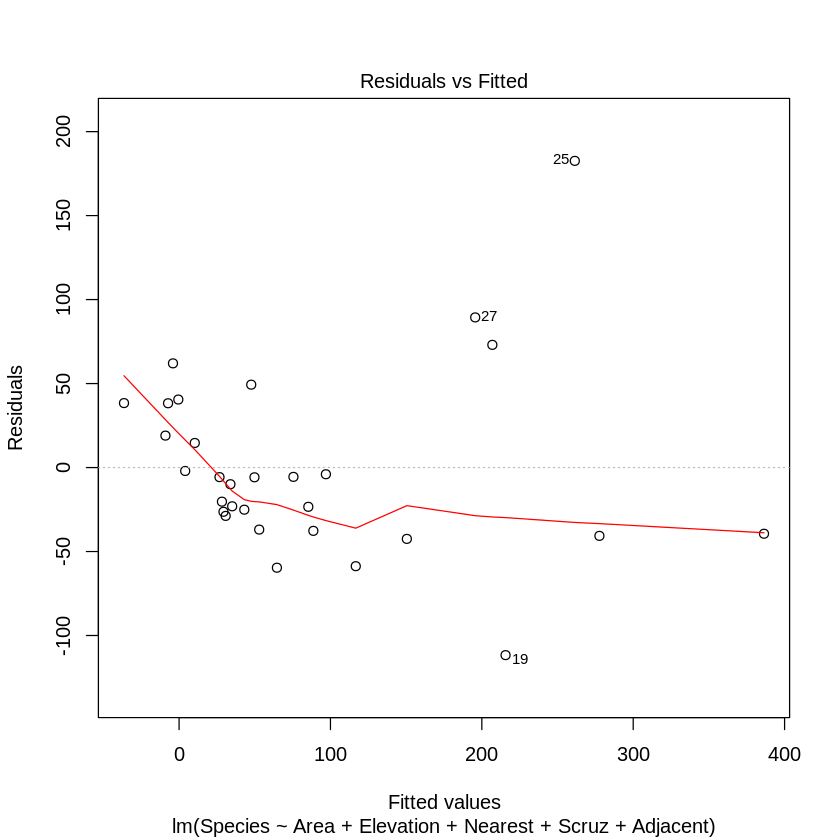

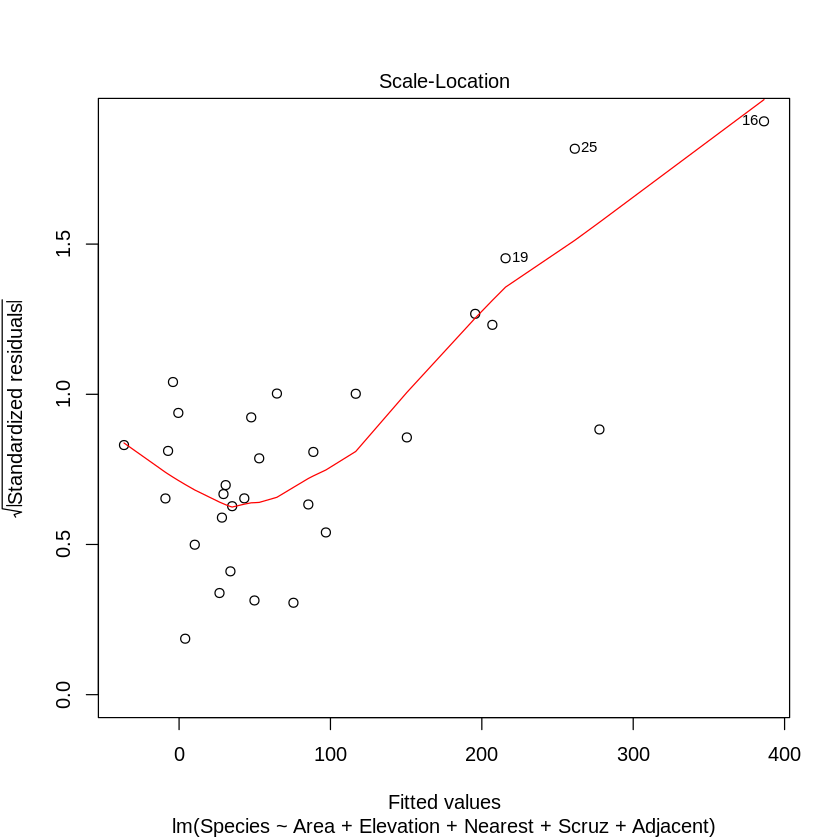

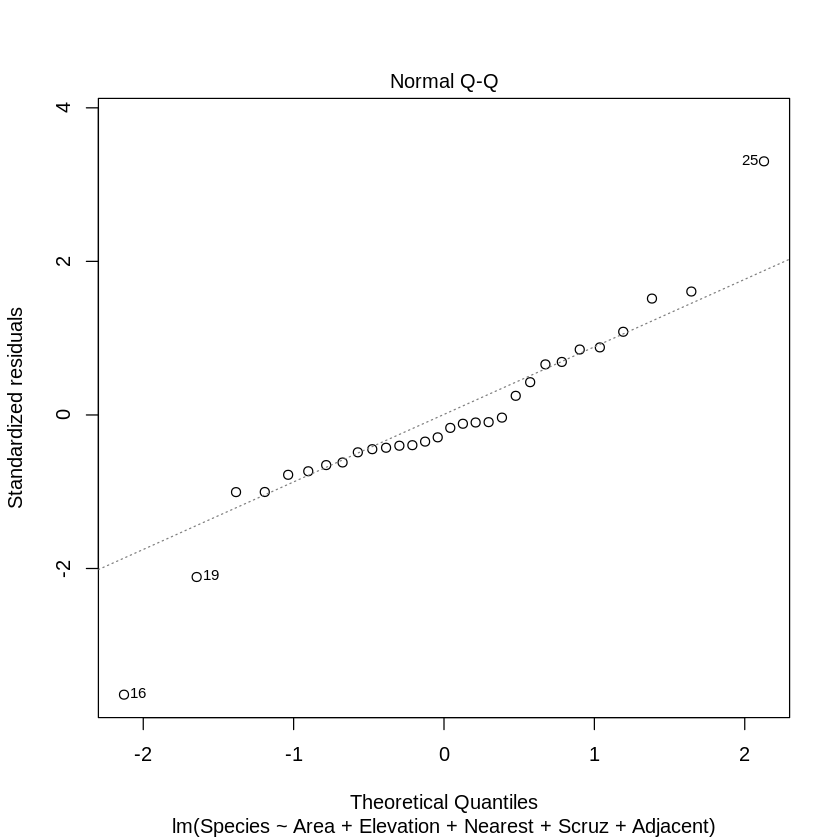

In [5]:
# Assign the linear model
lmod.gala <- lm(Species ~ Area + Elevation + Nearest + Scruz + Adjacent, data = data.gala)

# Check linearity
linear_check <- plot(lmod.gala, which = 1)

# Check homoscedasticity
homoskedasticity_check <- plot(lmod.gala, which = 3)

# Check normality
normality_check <- shapiro.test(lmod.gala$residuals)
qq_plot <- plot(lmod.gala, which = 2)

# Code the following as TRUE or FALSE
lmod.gala.linear = FALSE
lmod.gala.homoskedasticity = FALSE
lmod.gala.normality = FALSE


In [6]:
lmod.gala$coef[1]

(Intercept) 
   7.068221

In [7]:
lmod.gala$coef[2]

Area 
-0.02393834

In [8]:
lmod.gala$coef[3]

Elevation 
0.3194648

In [9]:
# Test Cell
if(!test_that("Checking if model coefficients are correct", {expect_equal(7.068221, as.numeric(lmod.gala$coef[1]), tol=1e-4)
                                                             expect_equal(-0.023938, as.numeric(lmod.gala$coef[2]), tol=1e-4)
                                                             expect_equal(0.319456, as.numeric(lmod.gala$coef[3]), tol=1e-4)})){
    print("At least one of the coefficients was wrong. Make sure your model is correct before doing diagnostics.")
}
# This cell has hidden test cases that will run after submission.

### 2. (b) Linear Transformations (8 points)

Recall that one strategy we used to address models that had nonconstant variance was to transform the response variable. Try the square root transform on the response fit to the same predictors. Store this model as `lmod.gala.sqrt`. Look at the diagnostic plots and consider if this model's assumptions are better than the last. Similar to the previous problem, for each assumption, answer `TRUE` if the model meets the assumption `FALSE` if not. Note that if a plot looks ambiguous, you can interpret it as "no evidence of a violation" and answer `TRUE`.

One thing to keep in mind is that transformations make the model harder to interpret. Think about how a $1$ unit increase in `Nearest` for your transformed model would affect `Species`. Put your answers into `sqrt.gala.linearity`, `sqrt.gala.homoskedasticity` and `sqrt.gala.normality`.

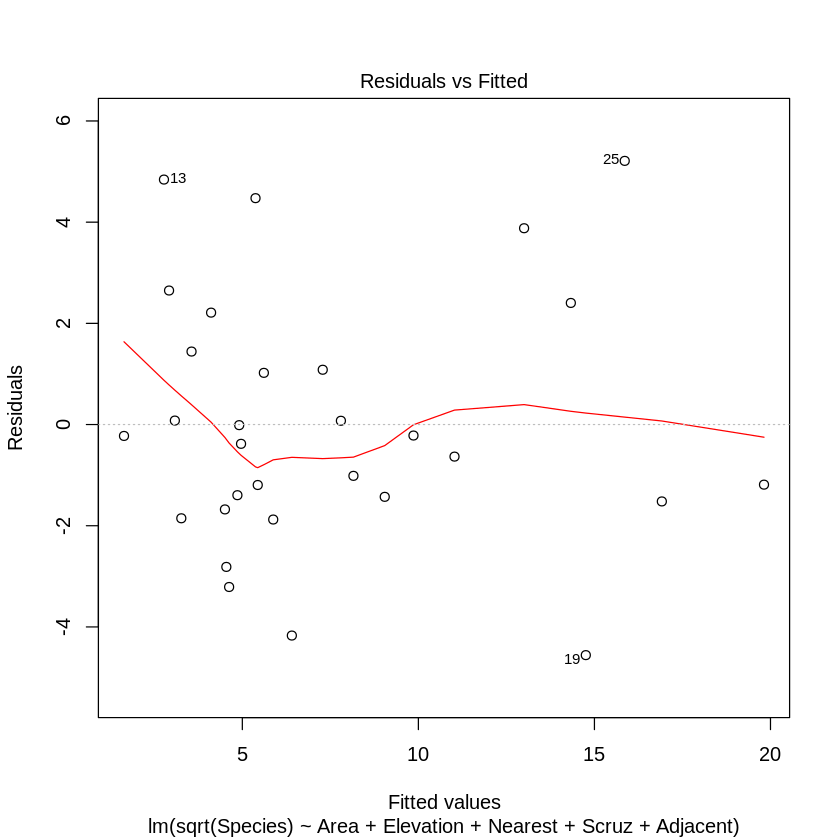

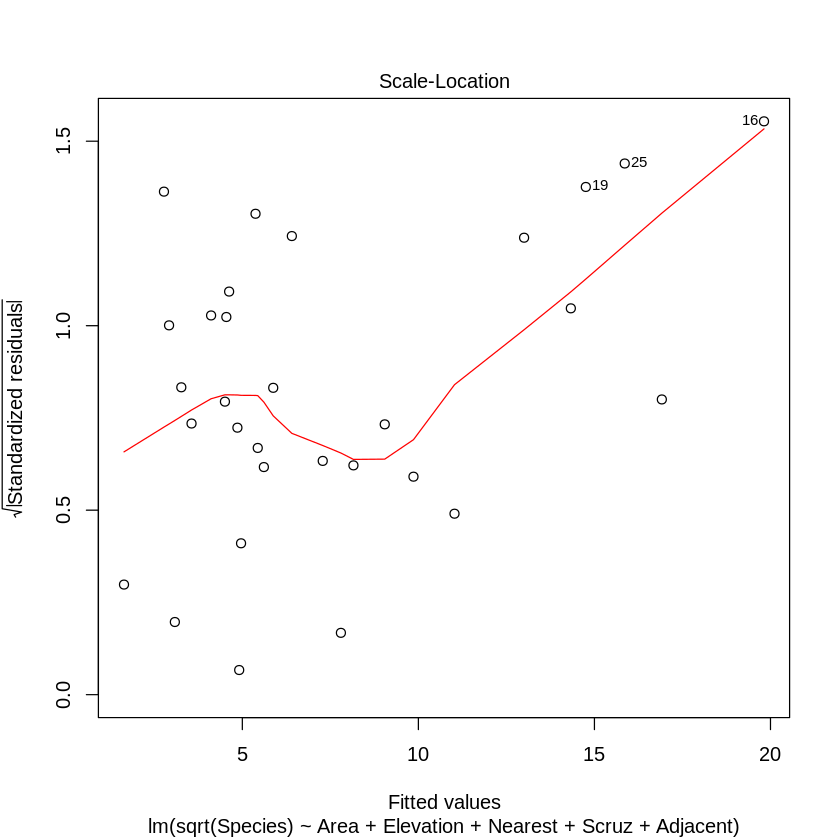

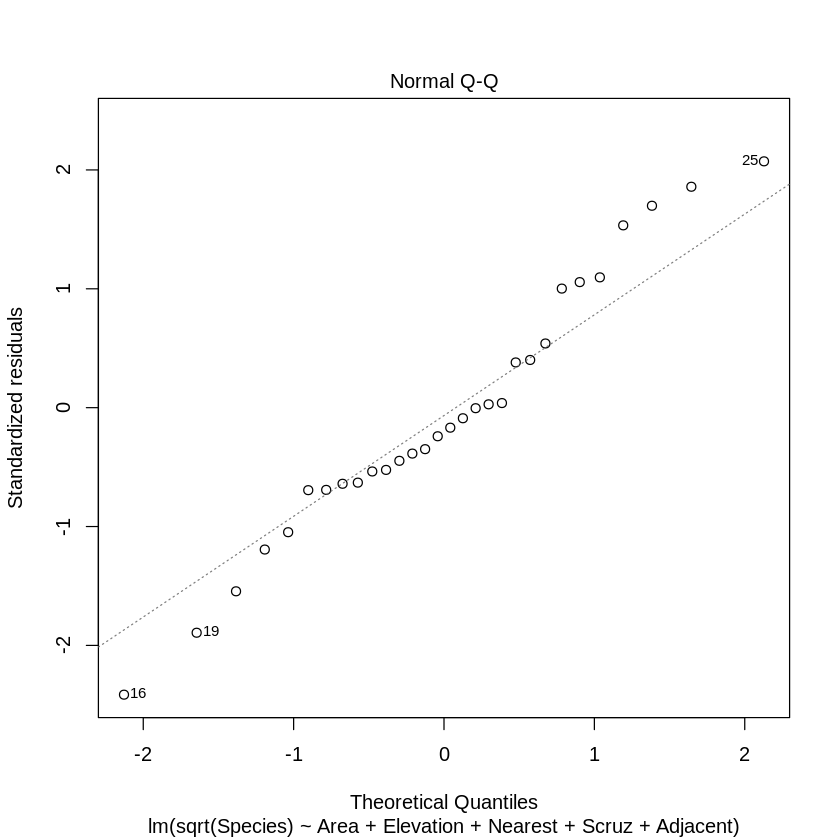

In [10]:
lmod.gala.sqrt <- lm(sqrt(Species) ~ Area + Elevation + Nearest + Scruz + Adjacent, data = data.gala)

# Check linearity
linearity_check <- plot(lmod.gala.sqrt, which = 1)

# Check homoscedasticity
homoskedasticity_check <- plot(lmod.gala.sqrt, which = 3)

# Check normality
normality_check <- shapiro.test(lmod.gala.sqrt$residuals)
qq_plot <- plot(lmod.gala.sqrt, which = 2)

sqrt.gala.linearity = TRUE
sqrt.gala.homoskedasticity = TRUE
sqrt.gala.normality = FALSE

In [11]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 2. (c) GLMs to the Rescue (6 points)

There's still some problems with the model. Because our response variable is counts, maybe linear models aren't the best anyways. Fit a GLM of appropriate family to the (untransformed) data, using the same predictors. Store this model as `glm.gala`. Plot the diagnostics plots and think about what assumptions should be met.

How do we interpret this model? In particular, fill in the blank: "A 1-unit increase in `Elevation` is associated with a multiplicative increase of $\text{_____}$ in `Species`, on average." Store this value as `glm.interp`.


Call:
glm(formula = Species ~ Area + Elevation + Nearest + Scruz + 
    Adjacent, family = poisson, data = data.gala)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.2752  -4.4966  -0.9443   1.9168  10.1849  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.155e+00  5.175e-02  60.963  < 2e-16 ***
Area        -5.799e-04  2.627e-05 -22.074  < 2e-16 ***
Elevation    3.541e-03  8.741e-05  40.507  < 2e-16 ***
Nearest      8.826e-03  1.821e-03   4.846 1.26e-06 ***
Scruz       -5.709e-03  6.256e-04  -9.126  < 2e-16 ***
Adjacent    -6.630e-04  2.933e-05 -22.608  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  716.85  on 24  degrees of freedom
AIC: 889.68

Number of Fisher Scoring iterations: 5


Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


Elevation 
 1.003547 


Elevation 
 1.003547

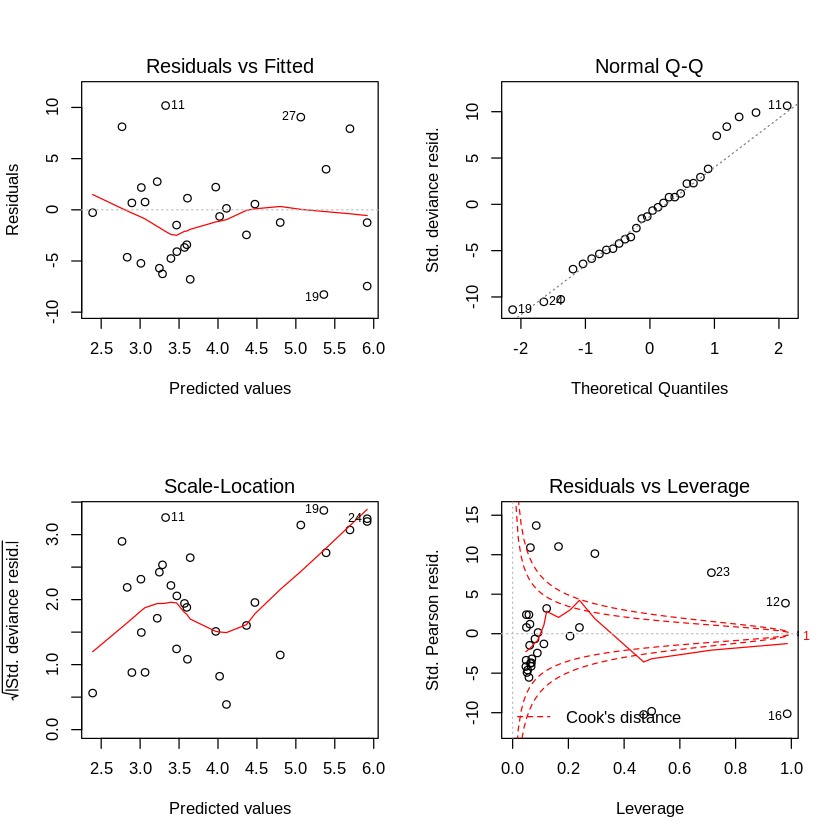

In [12]:
glm.gala <- glm(Species ~ Area + Elevation + Nearest + Scruz + Adjacent, family = poisson, data = data.gala)


# Summarize the model
summary(glm.gala)

# Diagnostic plots
par(mfrow = c(2, 2))
plot(glm.gala)

# Interpretation of Elevation coefficient
elevation_coef <- coef(glm.gala)["Elevation"]
glm.interp.result <- exp(elevation_coef)


print(glm.interp.result)


glm.interp <- exp(glm.gala$coef["Elevation"])

glm.interp

In [13]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [14]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [15]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 2. (d) GLM Goodness of Fit (6 points)

Our linear models didn't do a great job of fitting the data, how do we know if our GLM fits the data any better? Well, we don't have an easy scale of reference, like the $R^2$ value, for GLMs. What we can do is compare our model to other models, such as the null model, and see if ours performs significantly better.

Calculate the deviance of your model and store it as `glm.deviance`. Then check the goodness of fit of your model using Pearson's $\chi^2$ statistic. Store this value as `glm.chisq.stat`. Calculate the p-value for this statistic and store it as `glm.chisq.pval`. What does this tell you about your model?

In [16]:
# Fit the GLM with Poisson family
glm.gala <- glm(Species ~ Area + Elevation + Nearest + Scruz + Adjacent, family = poisson, data = data.gala)

# Summarize the model
summary(glm.gala)

# Calculate the deviance of the GLM
glm.deviance <- glm.gala$deviance
glm.deviance

# Calculate Pearson's chi-squared statistic
observed <- data.gala$Species
expected <- fitted(glm.gala)
pearson_residuals <- (observed - expected) / sqrt(expected)
glm.chisq.stat <- sum(pearson_residuals^2)
glm.chisq.stat

# Degrees of freedom
df <- length(observed) - length(coef(glm.gala))

# Calculate the p-value
glm.chisq.pval <- pchisq(glm.chisq.stat, df, lower.tail = FALSE)
glm.chisq.pval




Call:
glm(formula = Species ~ Area + Elevation + Nearest + Scruz + 
    Adjacent, family = poisson, data = data.gala)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.2752  -4.4966  -0.9443   1.9168  10.1849  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.155e+00  5.175e-02  60.963  < 2e-16 ***
Area        -5.799e-04  2.627e-05 -22.074  < 2e-16 ***
Elevation    3.541e-03  8.741e-05  40.507  < 2e-16 ***
Nearest      8.826e-03  1.821e-03   4.846 1.26e-06 ***
Scruz       -5.709e-03  6.256e-04  -9.126  < 2e-16 ***
Adjacent    -6.630e-04  2.933e-05 -22.608  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  716.85  on 24  degrees of freedom
AIC: 889.68

Number of Fisher Scoring iterations: 5


[1] 716.8458

[1] 761.9792

[1] 2.18719e-145

In [17]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [18]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [19]:
# Test Cell
# This cell has hidden test cases that will run after submission.